---
# Muschroom Classification
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms from the families Agaricus and Lepiota, extracted from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.
(https://www.kaggle.com/datasets/uciml/mushroom-classification)

In [2]:
data=pd.read_csv(os.getcwd()+'\\mushrooms.csv')

In [3]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## The dataset includes 23 species of mushrooms, with the following data recorded for each species:
#### Attribute Information
<ul>
<li>class: edible=e, poisonous=p</li>
<li>cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s</li>
<li>cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s</li>
<li>cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y</li>
<li>bruises: bruises=t, no=f</li>
<li>odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s</li>
<li>gill-attachment: attached=a, descending=d, free=f, notched=n</li>
<li>gill-spacing: close=c, crowded=w, distant=d</li>
<li>gill-size: broad=b, narrow=n</li>
<li>gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y</li>
<li>stalk-shape: enlarging=e, tapering=t</li>
<li>stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?</li>
<li>stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s</li>
<li>stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s</li>
<li>stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y</li>
<li>stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y</li>
<li>veil-type: partial=p, universal=u</li>
<li>veil-color: brown=n, orange=o, white=w, yellow=y</li>
<li>ring-number: none=n, one=o, two=t</li>
<li>ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z</li>
<li>spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y</li>
<li>population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y</li>
<li>habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d</li>
</ul>

#### Structure of the data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Descriptive statistics for numeric columns

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Descriptive statistics for text columns

In [6]:
data.describe(include='object')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Missing values

**Since there are no missing values ​​in this database, there is no need to handle missing values.**

In [7]:
check_na = pd.DataFrame({'Missing values count': pd.isnull(data).sum(),
                         'Missing values %': pd.isnull(data).sum() / data.shape[0]}).style.format({'Missing values %': '{:.2%}'})

In [8]:
check_na

,Missing values count,Missing values %
class,0,0.00%
cap-shape,0,0.00%
cap-surface,0,0.00%
cap-color,0,0.00%
bruises,0,0.00%
odor,0,0.00%
gill-attachment,0,0.00%
gill-spacing,0,0.00%
gill-size,0,0.00%
gill-color,0,0.00%


<AxesSubplot: >

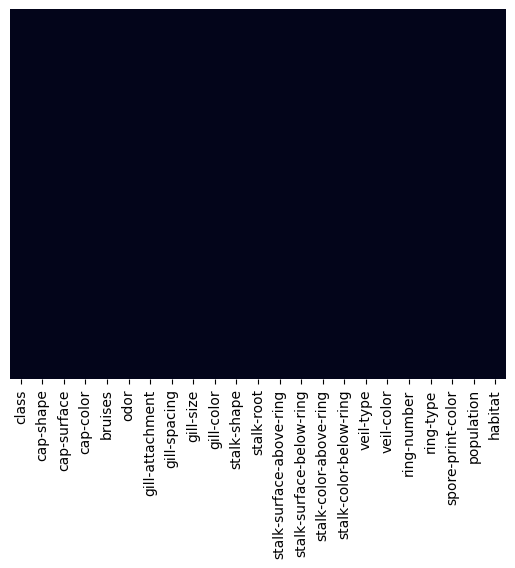

In [9]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False)

We will not need the (veil-type) column, since it contains only one value p - partial

In [10]:
data['veil-type']

0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: object

In [11]:
data.drop(columns="veil-type", inplace=True)

# Preliminary data analysis

In [12]:
sns.set_theme(style='whitegrid', palette='husl')

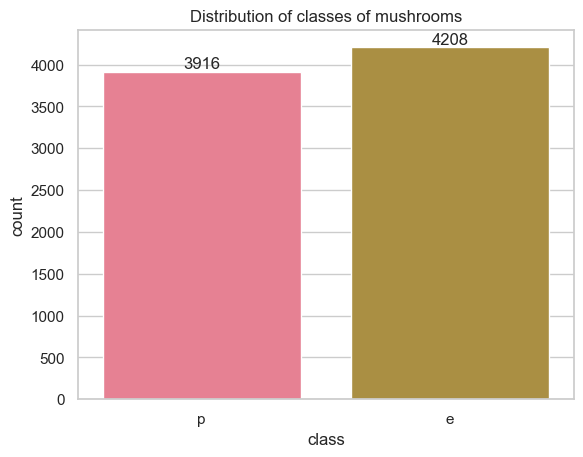

In [13]:
g=sns.countplot(data=data, x='class')
for i in g.containers:
 plt.bar_label(i)
g.set(title='Distribution of classes of mushrooms')
plt.show()

#### Heatmap helps us to understand the interaction between different characteristics of fungi, which can be useful in building a classification model.

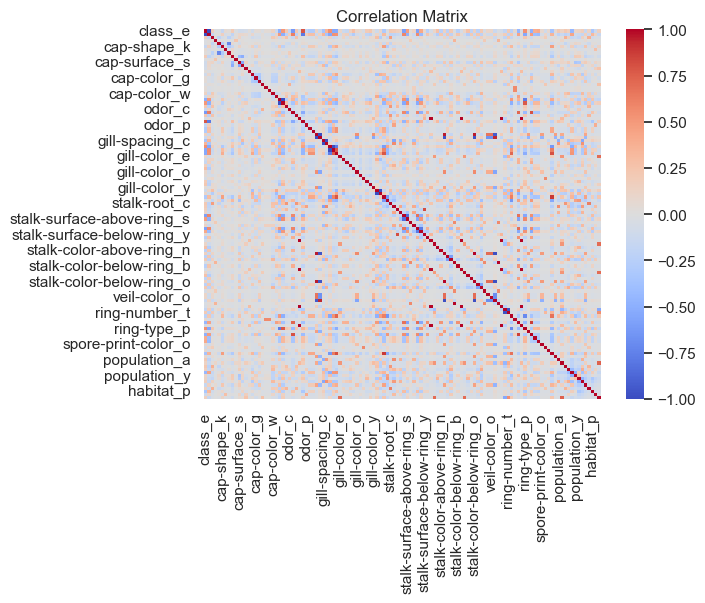

In [14]:
data_encoded = pd.get_dummies(data)
corr = data_encoded.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Function distributions
We will make a graphical plot for each characteristic to observe the frequency distributions.
Since we don't have numeric functions, we will do this exclusively with bar charts.

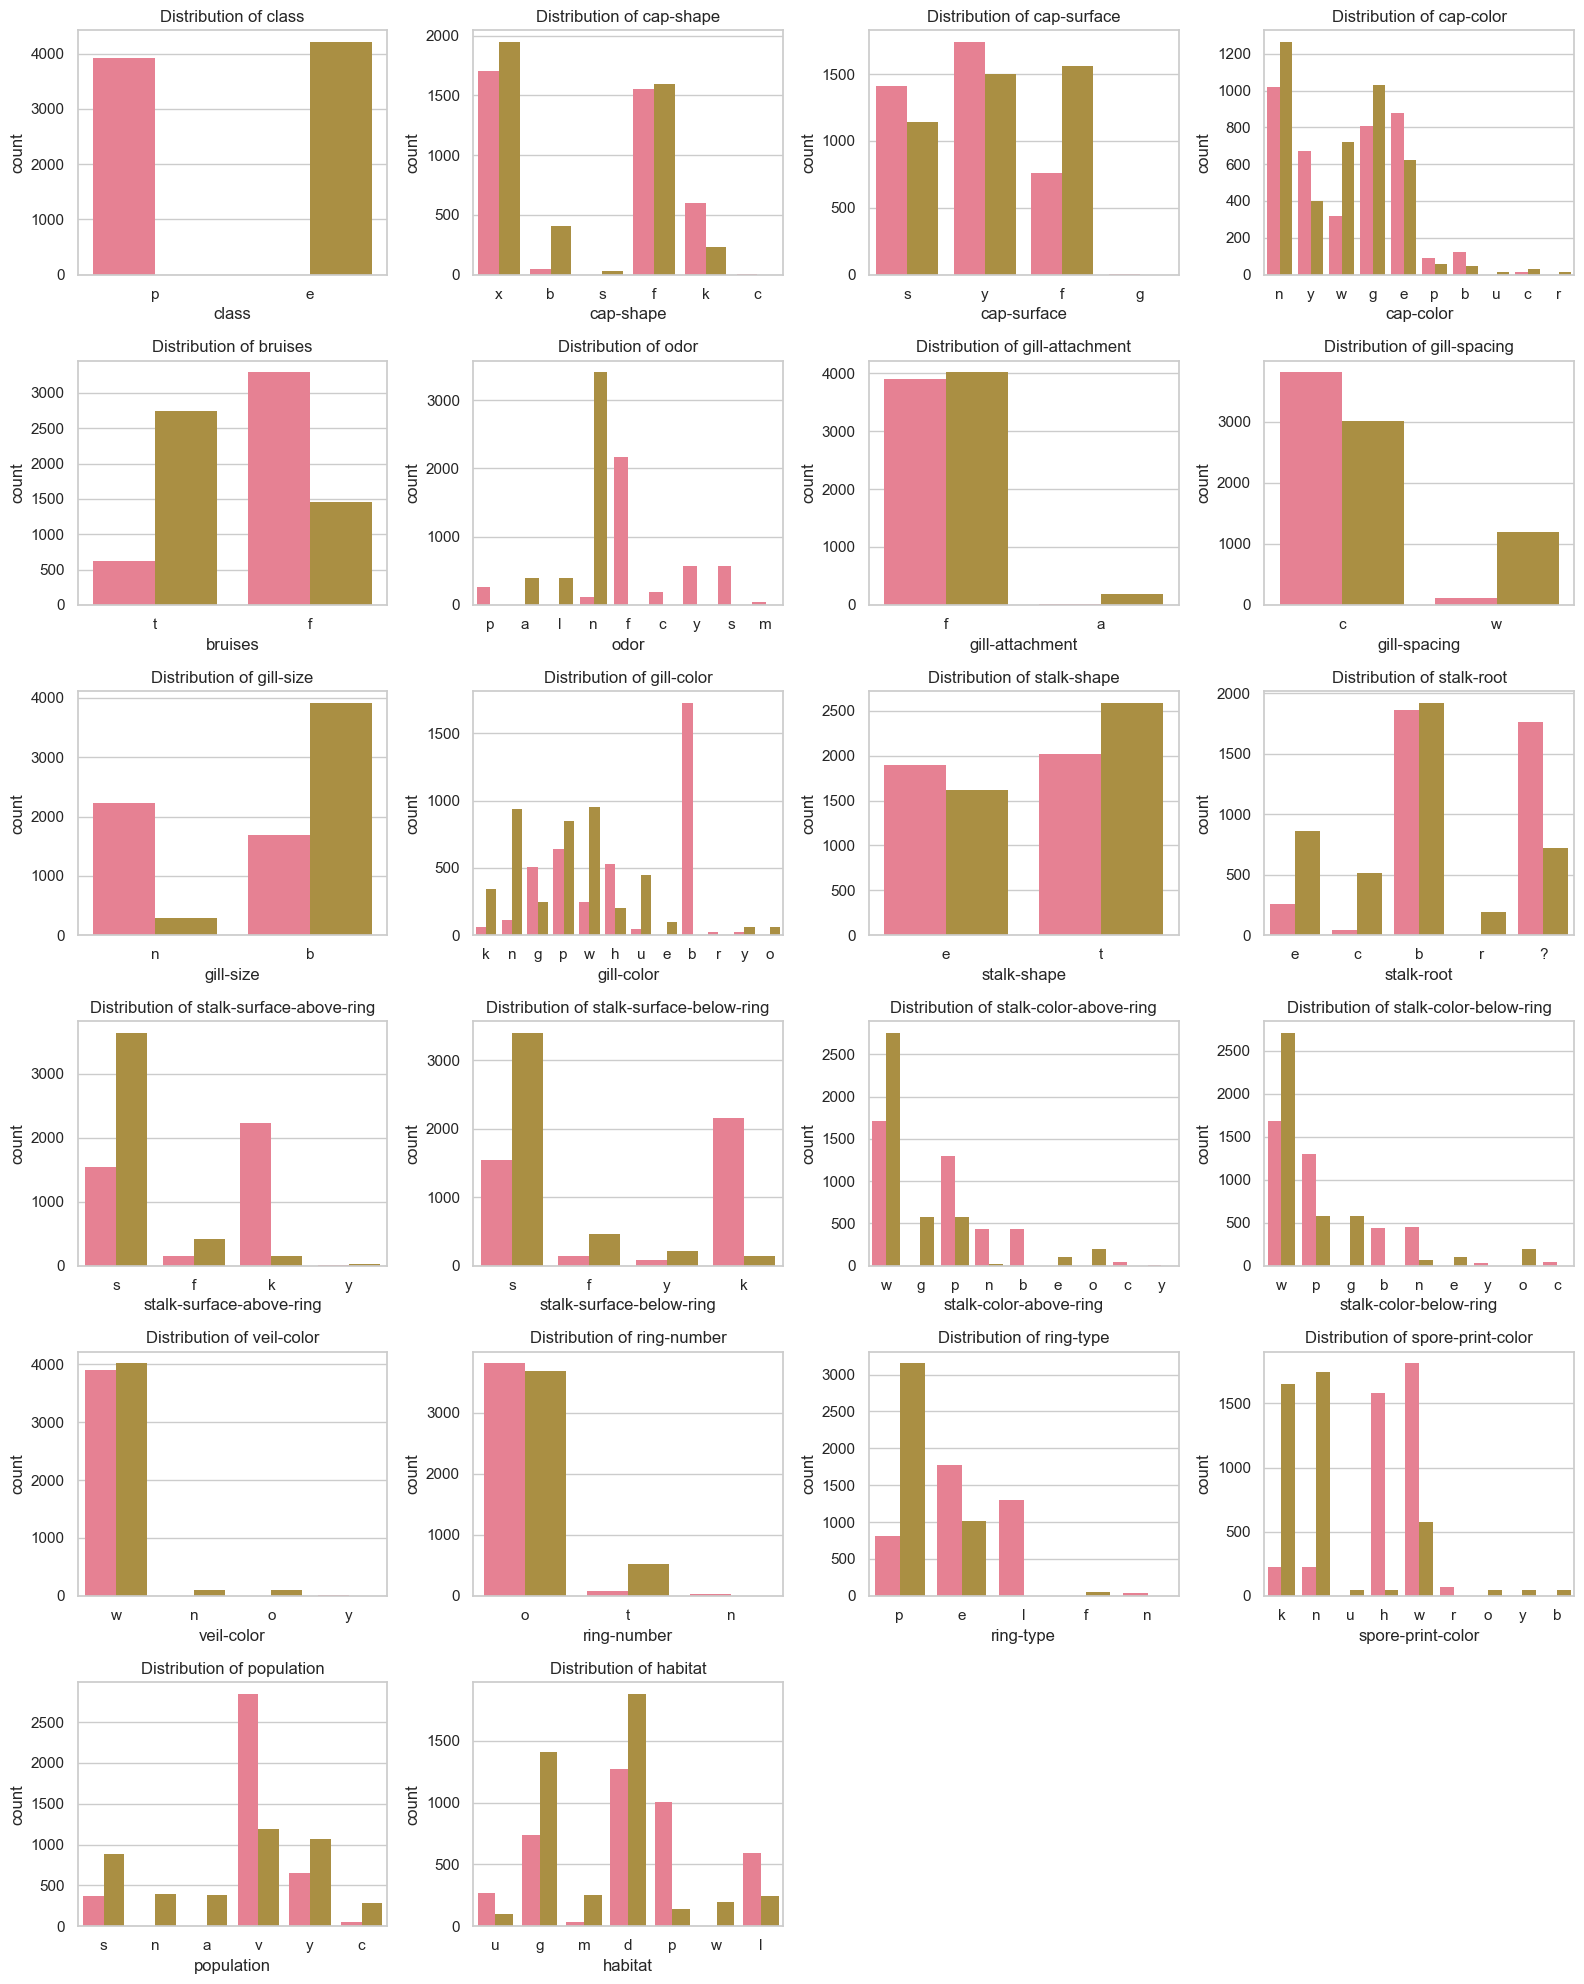

In [16]:
features = data.columns

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 20))

for feature, ax in zip(features, axes.flatten()):    
    sns.countplot(x=feature, hue='class', data=data, ax=ax, linewidth=0)
    ax.set_title(f"Distribution of {feature}")
    ax.get_legend().remove()

# Remove all unused subtables
for remaining_ax in axes.flatten()[len(features):]:
    remaining_ax.remove()

plt.tight_layout()
plt.show()

# Preparing the data for training the models

To prepare the data, it will be necessary to remove the "class" column. Applies a **LabelEncoder** to each column of data to convert letter values ​​to numeric values. Multiple **mappings_dict** are created for each of the encoded attributes. The data is then split into **X** and **y**, with **X** containing all attributes except "class", which is used as the class marker. Finally, **StandardScaler** is applied to **X** to standardize the data, which is a common step in preparing data for machine learning.

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [18]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [19]:
X = data.drop(columns="class")
y = data["class"]

In [20]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**We split the set into training and test set in the ratio 70:30**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5921,1.029712,0.140128,-1.769549,1.185917,-1.019565,0.162896,-0.438864,-0.669038,-0.511472,0.873511,...,0.683778,-2.372490,0.622441,0.631991,0.142037,-0.256132,0.948081,-1.089919,0.284330,2.030028
1073,1.029712,-1.486157,-0.591075,1.185917,0.406562,0.162896,-0.438864,-0.669038,0.618426,0.873511,...,0.683778,0.586385,0.096577,0.631991,0.142037,-0.256132,0.948081,-0.670195,1.083049,-0.877169
3710,1.029712,-1.486157,-0.591075,-0.843230,-1.019565,0.162896,-0.438864,-0.669038,0.618426,-1.144806,...,-0.925437,-0.893053,-0.955152,-3.038361,0.142037,-0.256132,-0.162067,-1.089919,0.284330,-0.877169
144,1.029712,0.953270,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-1.313108,-0.295730
5469,1.029712,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.925437,-0.893053,0.622441,0.107655,0.142037,-0.256132,-1.272216,1.428426,0.284330,-0.877169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1.029712,0.953270,-0.198250,-0.843230,-1.019565,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.925437,0.586385,0.096577,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,1.448589
5390,-0.216992,0.953270,-0.983899,1.185917,0.406562,0.162896,-0.438864,-0.669038,1.465850,-1.144806,...,0.683778,0.586385,0.622441,-1.989689,0.142037,3.433255,-1.272216,1.428426,-2.111827,2.611468
860,-0.840343,0.953270,-0.198250,1.185917,-0.544189,0.162896,-0.438864,-0.669038,1.465850,-1.144806,...,0.683778,2.065822,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,1.083049,1.448589
7603,-0.216992,0.140128,-0.983899,-0.843230,-1.019565,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,0.586385,0.096577,0.107655,0.142037,-0.256132,-1.272216,1.428426,0.284330,1.448589


In [24]:
pd.DataFrame(y_train.head())

,class
5921,1
1073,0
3710,1
144,0
5469,1


In [25]:
y_train.value_counts()/y_train.count()

0    0.518994
1    0.481006
Name: class, dtype: float64

# Training the models

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score
from sklearn.model_selection import cross_val_score

In [27]:
log_model=LogisticRegression(max_iter=1500)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1500)

In [28]:
print(classification_report(y_test,log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1257
           1       0.95      0.95      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [29]:
print(classification_report(y_train,log_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2951
           1       0.95      0.94      0.95      2735

    accuracy                           0.95      5686
   macro avg       0.95      0.95      0.95      5686
weighted avg       0.95      0.95      0.95      5686



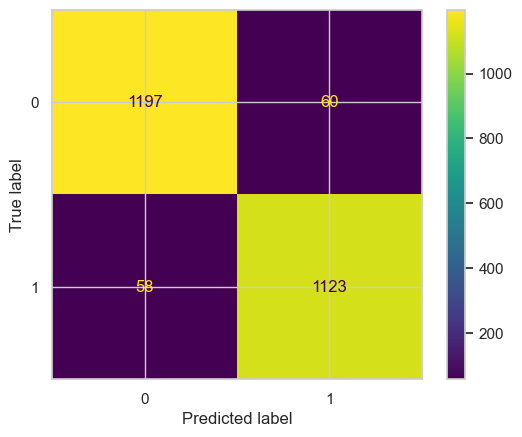

In [30]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,log_model.predict(X_test))).plot()

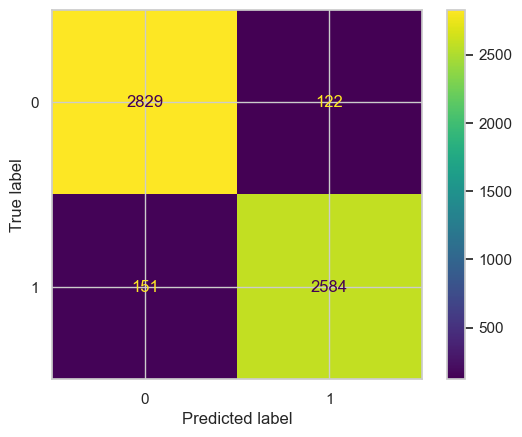

In [31]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,log_model.predict(X_train))).plot()

In [32]:
scores = cross_val_score(log_model, X_train, y_train, cv=5)

In [33]:
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 0.949347015934697 (+/- 0.014122698929888346)


## Decision Tree

#### Default tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt1=DecisionTreeClassifier()
dt1.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
scores = cross_val_score(dt1, X_train, y_train, cv=5)
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 1.0 (+/- 0.0)


In [37]:
print(classification_report(y_test,dt1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [38]:
print(classification_report(y_train,dt1.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686



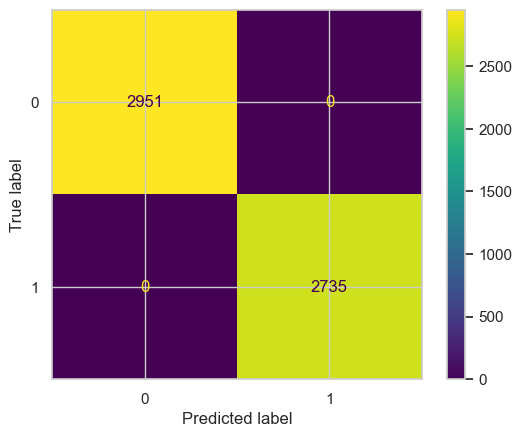

In [39]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,dt1.predict(X_train))).plot()

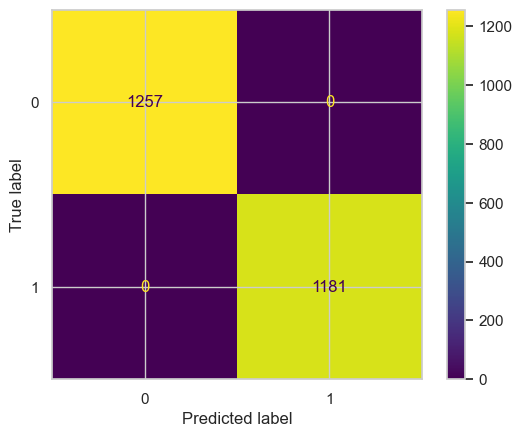

In [40]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,dt1.predict(X_test))).plot()

#### Tuned tree

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
params={'max_depth':[3,5,7,10],
 'min_samples_leaf':[3,5,10,15],
 'ccp_alpha':[0,0.005,0.01]}

In [43]:
dt2=DecisionTreeClassifier()

In [44]:
dt2=GridSearchCV(dt2,params,cv=5,scoring='recall')

In [45]:
dt2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.005, 0.01],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [3, 5, 10, 15]},
             scoring='recall')

In [46]:
scores = cross_val_score(dt1, X_train, y_train, cv=5)
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 1.0 (+/- 0.0)


In [47]:
dt2.best_params_

{'ccp_alpha': 0, 'max_depth': 7, 'min_samples_leaf': 3}

In [48]:
scores = cross_val_score(dt2, X_train, y_train, cv=5)
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 1.0 (+/- 0.0)


In [49]:
print(classification_report(y_test,dt2.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [50]:
print(classification_report(y_train,dt2.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686



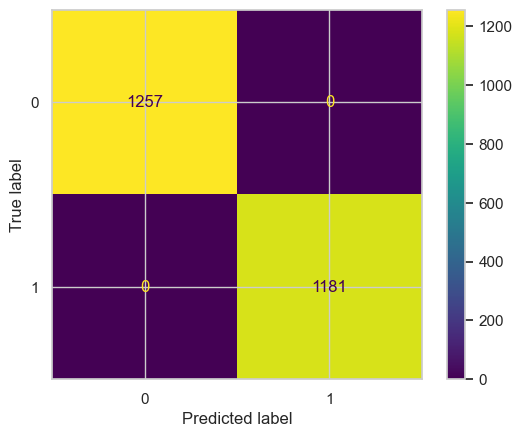

In [51]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,dt2.predict(X_test))).plot()

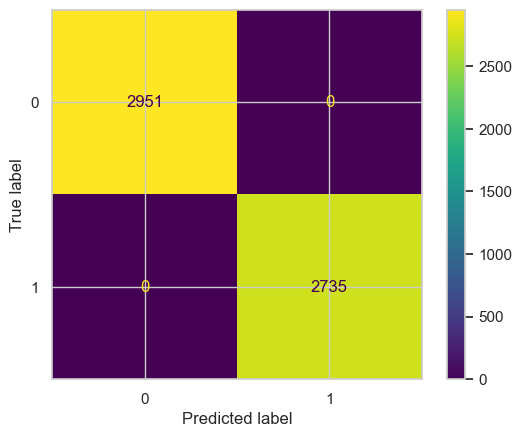

In [52]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,dt2.predict(X_train))).plot()

## Random Forest

#### Default Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

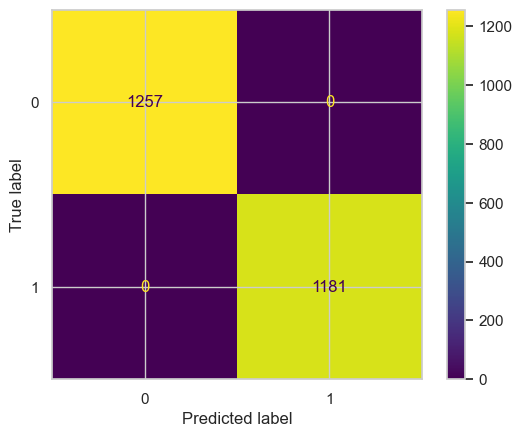

In [55]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rf1.predict(X_test))).plot()

In [56]:
print(classification_report(y_test,rf1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#### Tuned Forest


In [57]:
params={'max_depth':[3,5,7,10],
 'min_samples_leaf':[3,5,10,15],
 'max_samples':[0.3,0.5,0.7,1.0],
 'n_estimators':[25,50,100,500]}

In [58]:
rf2=RandomForestClassifier()

In [59]:
rf2=RandomizedSearchCV(rf2, param_distributions=params, n_iter=100, cv=5, random_state=42)

In [60]:
rf2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [3, 5, 7, 10],
                                        'max_samples': [0.3, 0.5, 0.7, 1.0],
                                        'min_samples_leaf': [3, 5, 10, 15],
                                        'n_estimators': [25, 50, 100, 500]},
                   random_state=42)

In [61]:
rf2.best_params_

{'n_estimators': 50,
 'min_samples_leaf': 5,
 'max_samples': 1.0,
 'max_depth': 10}

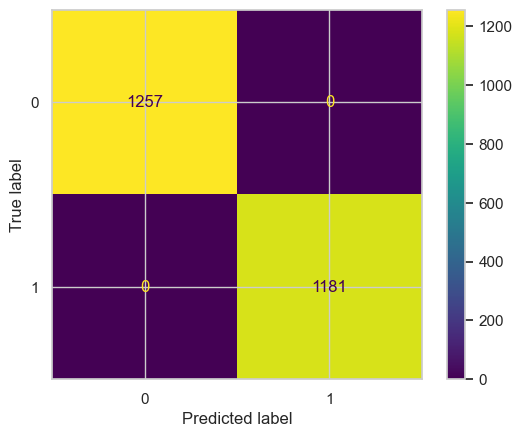

In [62]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rf2.predict(X_test))).plot()

In [63]:
print(classification_report(y_test,rf2.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Naive Bayes model

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [66]:
print(classification_report(y_test,gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1257
           1       0.93      0.93      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [67]:
print(classification_report(y_train,gnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2951
           1       0.94      0.92      0.93      2735

    accuracy                           0.93      5686
   macro avg       0.93      0.93      0.93      5686
weighted avg       0.93      0.93      0.93      5686



In [68]:
scores = cross_val_score(gnb, X_train, y_train, cv=5)
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 0.9252522207950191 (+/- 0.02693214782681296)


# Performance evaluation of models

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

We define a function model_reprot to retrieve the metrics for
the presentation of models from the classification report.

In [70]:
def model_report(model,model_id, positive, negative):
 """
 model - trained model
 clr - classification report as dict
 positive - positive class
 negative - negative class
 """

 clr=classification_report(y_test,model.predict(X_test),output_dict=True)
 data={'model':str(model),
 'sensitivity':clr[str(positive)]['recall'],
 'specificity':clr[str(negative)]['recall'],
 'f1 score':clr[str(positive)]['f1-score'],
 'accuracy':clr['accuracy'],
 'balanced accuracy':clr['macro avg']['recall'],
 'auc':roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
 }
 return pd.DataFrame(data=data, index=[model_id])

**We define a list of trained models and user labels**

In [71]:
models=pd.DataFrame(data={'model':[log_model,dt1,dt2,rf1,rf2,gnb],
 'model id':['Logistic Regression','DesTree default', 'DesTree tuned','RandForest default','RandForest tuned','Naive Bayes']})

In [72]:
report=pd.DataFrame()
for item in models.index:
 model=models['model'][item]
 model_id=models['model id'][item]
 report=pd.concat([report,model_report(model,model_id,1,0)])
report

,model,sensitivity,specificity,f1 score,accuracy,balanced accuracy,auc
Logistic Regression,LogisticRegression(max_iter=1500),0.950889,0.952267,0.950085,0.95160,0.951578,0.987611
DesTree default,DecisionTreeClassifier(),1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
DesTree tuned,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
RandForest default,RandomForestClassifier(random_state=42),1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
RandForest tuned,"RandomizedSearchCV(cv=5, estimator=RandomFores...",1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
Naive Bayes,GaussianNB(),0.926334,0.932379,0.927119,0.92945,0.929356,0.954329


## Comparing models

### Comparison by AUC

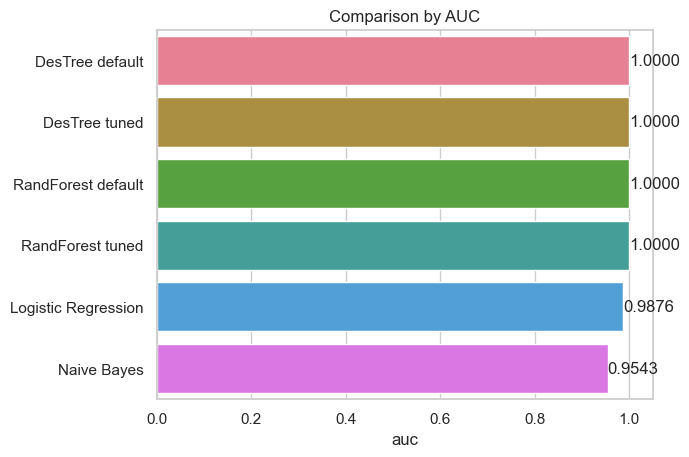

In [73]:
g=sns.barplot(data=report.sort_values('auc',ascending=False),
 y=report.sort_values('auc',ascending=False).index,
 x='auc')
g.set(title='Comparison by AUC')
for i in g.containers:
 g.bar_label(i,fmt='%.4f')

### Comparison by sensitivity

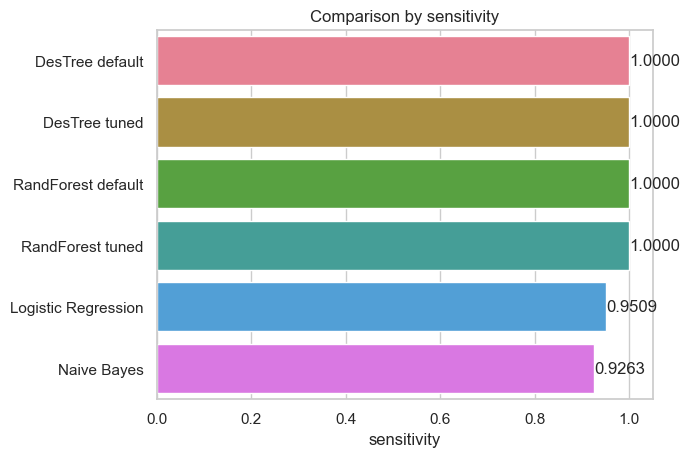

In [74]:
g=sns.barplot(data=report.sort_values('sensitivity',ascending=False),
 y=report.sort_values('sensitivity',ascending=False).index,
 x='sensitivity')
g.set(title='Comparison by sensitivity')
for i in g.containers:
 g.bar_label(i,fmt='%.4f')

### Balanced accuracy comparison

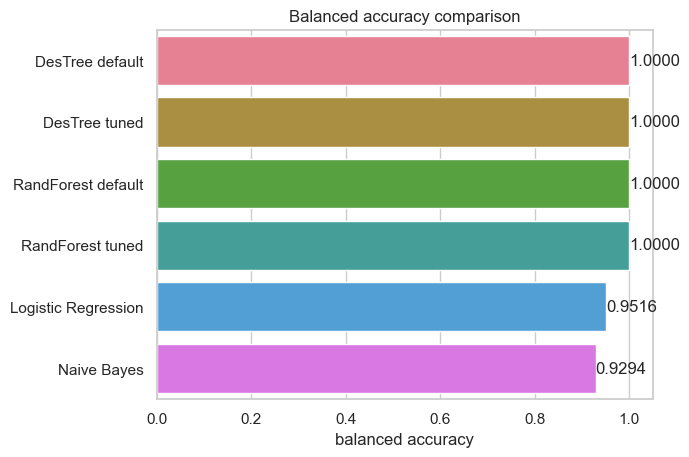

In [75]:
g=sns.barplot(data=report.sort_values('balanced accuracy',ascending=False),
 y=report.sort_values('balanced accuracy',ascending=False).index,
 x='balanced accuracy')
g.set(title='Balanced accuracy comparison')
for i in g.containers:
 g.bar_label(i,fmt='%.4f')

From the comparison of different performance metrics, we can conclude that all models are able to classify mushrooms correctly according to their class.

# Interpret the models

## Decision Tree model 1

In [76]:
from sklearn import tree

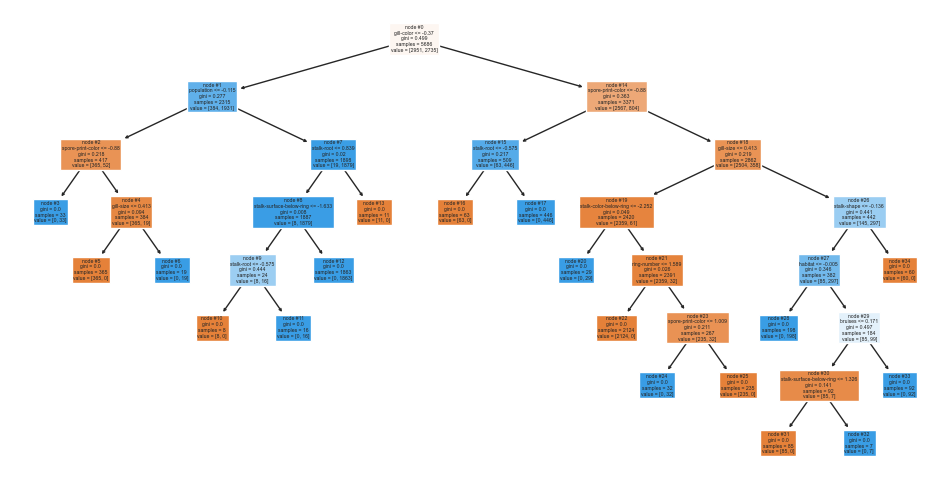

In [77]:
plt.figure(figsize=(12,6))
tree.plot_tree(dt1,feature_names=X_train.columns,filled=True,node_ids=True)
plt.show()

In [78]:
importances = dt1.feature_importances_

In [79]:
features=pd.DataFrame(data={'feature':list(X_test.columns),'importance':list(importances)})
features.sort_values('importance',ascending=False,inplace=True)
features

,feature,importance
8,gill-color,0.343022
18,spore-print-color,0.210956
19,population,0.180337
7,gill-size,0.122853
10,stalk-root,0.050287
3,bruises,0.027663
9,stalk-shape,0.022083
14,stalk-color-below-ring,0.019649
20,habitat,0.014338
12,stalk-surface-below-ring,0.006411


C:\Users\radi2\AppData\Local\Temp\ipykernel_16684\2269149160.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


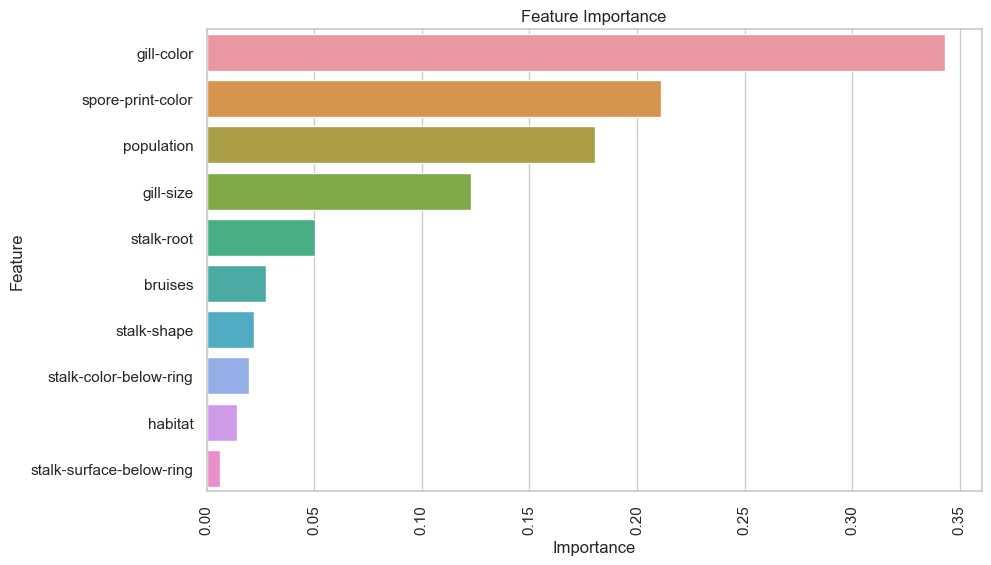

In [80]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='importance',y='feature',data=features[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

According to the analysis of the relative importance of the factor variables in the database, we can conclude that the factor with the greatest importance is **grill-color**. In second place is **spore-print-color** and in third place is **population**. The **stalk-color-above-ring** factor is of the least relative importance.

## RandomForest model 1

In [81]:
importancesRF = rf1.feature_importances_

In [82]:
featuresRF=pd.DataFrame(data={'feature':list(X_test.columns),'importance':list(importancesRF)})
featuresRF.sort_values('importance',ascending=False,inplace=True)
featuresRF

,feature,importance
4,odor,0.183750
7,gill-size,0.125760
8,gill-color,0.120640
18,spore-print-color,0.088975
17,ring-type,0.068582
10,stalk-root,0.055581
19,population,0.055258
3,bruises,0.051569
11,stalk-surface-above-ring,0.040186
6,gill-spacing,0.037864


C:\Users\radi2\AppData\Local\Temp\ipykernel_16684\155101832.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


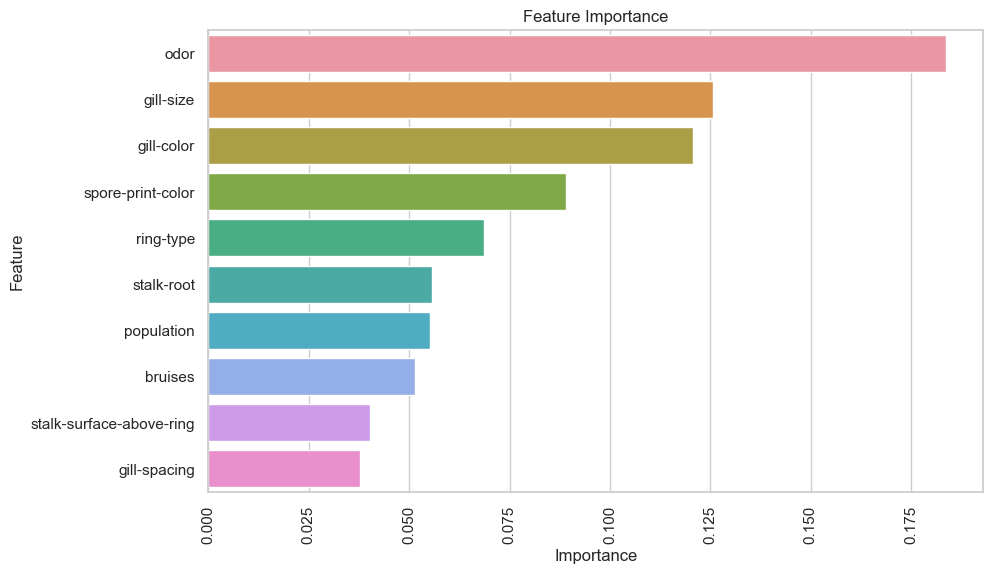

In [83]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='importance',y='feature',data=featuresRF[:10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

According to the analysis of the relative importance of the factor variables in a database, we can conclude that the factor with the greatest importance is **odor**. In second place is **gill-size** and in third place is **gill-color**. The **gill-spacing** factor is of the least relative importance.

## SHAP summary plot

In [84]:
import shap
shap.initjs()

## Tuned Random Forest

In [85]:
shap_model=rf2.best_estimator_

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


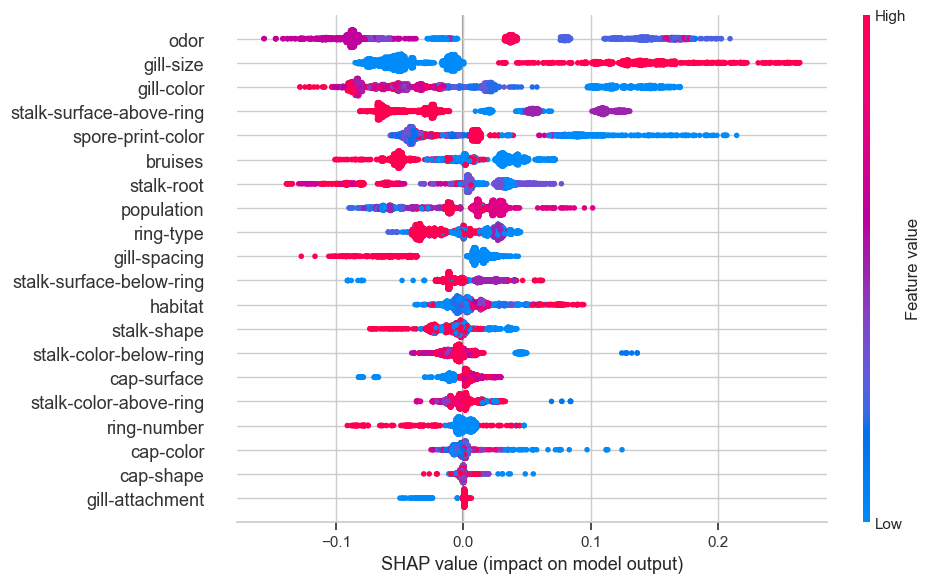

In [86]:
explainer = shap.TreeExplainer(shap_model)
shap_obj = explainer(X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values=np.take(shap_obj.values, 1, axis=-1),
                   features=pd.DataFrame(X_test, columns=X.columns),
                   feature_names=list(X.columns),
                   plot_size=(10, 6))

## Logistic Regression model

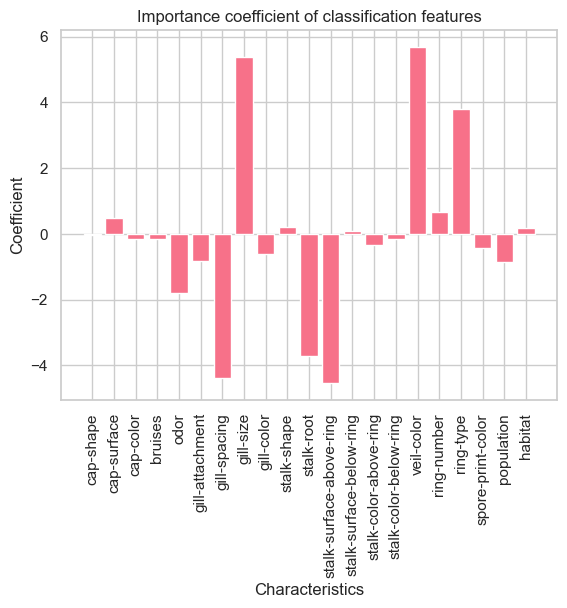

In [87]:
# taking the coefficients of the signs
coef = log_model.coef_[0]

# create a list of character names
features = list(X_train.columns)

# build graph
plt.bar(features, coef)
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Coefficient')
plt.title('Importance coefficient of classification features')
plt.show()

From the analysis of the results, it can be seen that the **Decision Tree , RandomForest** models have an accuracy of **1.0**, which can be interpreted as a very high accuracy in predicting the target variable. It is possible that these models are overtrained, despite their perfect results on **X_train and X_test** tests. The **Logistic Regression, Naive Bayes** models perform well to approximately **1.0**, which is an attestation for an excellent rating.